<a href="https://colab.research.google.com/github/MarriamSiddiqui/Data-Visualization-in-Python/blob/main/Data_Visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Dataset

In [ ]:
!unzip /content/customer_shopping_data.csv.zip

Archive:  /content/customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


# Libraries and Dependencies

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Reading Dataset

In [ ]:
data = pd.read_csv('/content/customer_shopping_data.csv')
data.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon

# Data Preprocessing
Understanding and preprocessing the data before we start the analysis.

In [ ]:
data.shape

(99457, 10)

In [ ]:
data.describe()

age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000

In [ ]:
# Checking null values in dataset
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
item_sales        0
day               0
month             0
year              0
dtype: int64

# Feature Engineering
Creating new feature that will aid in analysis.

In [ ]:
data['item_sales'] = data['quantity'] * data['price']
data[["day", "month", "year"]] = data["invoice_date"].str.split("/", expand = True)

# Data Visualization
## Who buys more items between men and women?

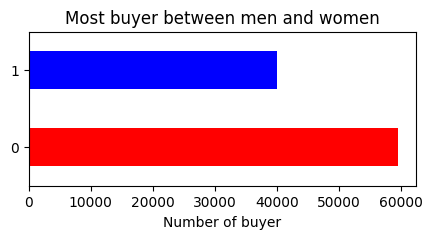

In [ ]:
data['gender'].value_counts().plot(kind='barh',figsize=(5,2),color=['red','blue'])
plt.xlabel("Number of buyer")
plt.title("Most buyer between men and women")
plt.show()

## Analyzing the relation of customer's age to amount spent. It shows youngsters aged 18-23 and adults aged above 63 spend the most

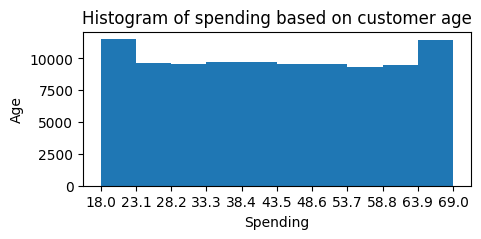

In [ ]:
count, bin_edges = np.histogram(data['age'])
data['age'].plot(kind="hist",figsize=(5,2),xticks=bin_edges)
plt.title('Histogram of spending based on customer age')
plt.ylabel('Spending') 
plt.xlabel('Age')
plt.show()

## Which Gender buys which item more?
Hover over items to see the quantites bought.

In [ ]:
fig = px.histogram(data, x='category',y='price',color="gender",labels={'category':'Category','gender':'Gender'})
fig.show()

## How shopping trend has been over past 3 years? In comparison to past two years, this year, both genders have shopped approximately equal times.

In [ ]:
fig = px.histogram(data, x='year',y='quantity',color="gender",labels={'year':'Years','gender':'Gender','sum of quantity':'Quantity'})
fig.show()

## Which malls generate the highest revenue?

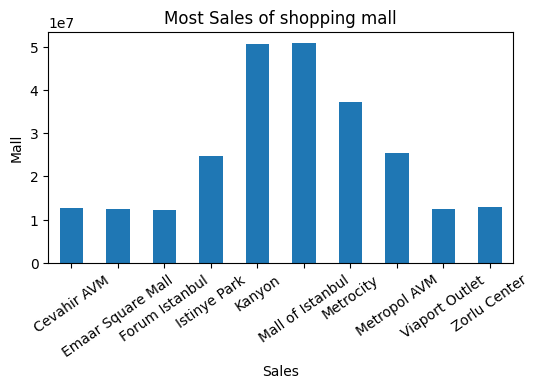

In [ ]:
# Let's see which the most sales shopping mall
data_mall = data.groupby("shopping_mall")["item_sales"].sum()
data_mall.plot(kind="bar",figsize=(6, 3))

plt.title('Most Sales of shopping mall')
plt.xlabel('Sales')
plt.ylabel('Mall')
plt.xticks(rotation = 35)
plt.show()

## Which gender prefer which mall for shopping? Kanyon and Mall of Istunbul are equally preffered.

In [ ]:
fig = px.histogram(data, x='shopping_mall',y='price',color="gender",labels={'shopping_mall':'Mall Name','gender':'Gender'})
fig.show()

In [ ]:
def Distribution_df(dataframe,col):
    """
    This function takes a dataframe and a column name as input.
    It groups the data in the dataframe based on the values in the specified column.
    Calculates the sum of total_price and quantity for each value in the column.
    It then creates a new dataframe with the aggregated results.
    Adds a new column 'avg_revenue' which is the total_price divided by quantity, and returns the new dataframe.
    """
    data = dataframe.groupby(by=col).agg({'item_sales':np.sum,'quantity': sum})
    df = pd.DataFrame(data)
    df.reset_index(inplace=True)
    df['avg_revenue'] = df['item_sales'] / df['quantity']
    return df

## Analyzing the items bought by both genders and revenue generated by each. Males shop lesser and as a result generate lesser revenue.

In [ ]:
labels = ["Female","Male"]
gender_df=Distribution_df(data,'gender')
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[gender_df['quantity'][0], gender_df['quantity'][1]]),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[gender_df['item_sales'][0], gender_df['item_sales'][1]]),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.65, hoverinfo="label+percent+value")

fig.update_layout(
    title_text="Gender Distribution",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Count', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='Revenue', x=0.815, y=0.5, font_size=20, showarrow=False),
                 ])
fig.show()

## Which items are bought the most?

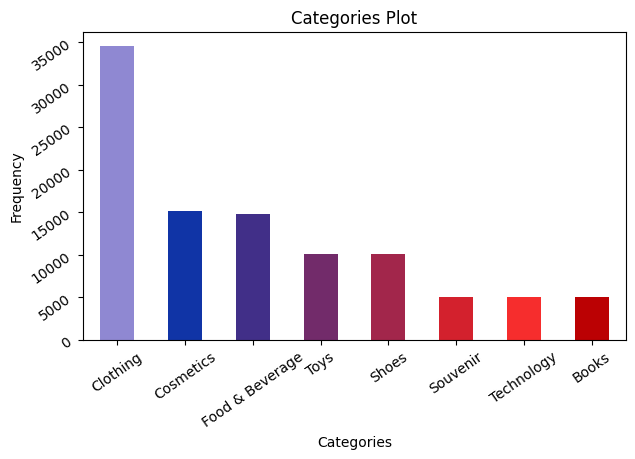

In [ ]:
# Let's see the most item categories that has been purchased
colors = ['#8F88D2', '#1034A6', '#412F88', '#722B6A', '#A2264B','#D3212D' ,'#F62D2D', '#BB0103']
data['category'].value_counts().plot(kind='bar',figsize=(7,4),color=colors)
plt.title('Categories Plot')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.yticks(rotation = 35)
plt.xticks(rotation = 35)
plt.show()

## Analyzing the correlation between each feature

In [ ]:
categorical_feature = ['gender', 'category', 'payment_method', 'shopping_mall']
le = LabelEncoder()
for col in categorical_feature:
    data[col] = le.fit_transform(data[col])

<Axes: >

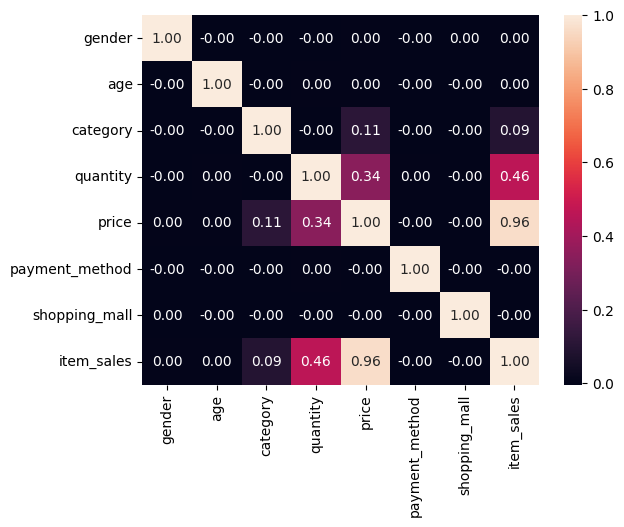

In [ ]:
data_corr = data.corr() # Generate correlation matrix
sns.heatmap(data_corr,  fmt=".2f",annot=True)